___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

In [ ]:
from IPython.display import Image
Image(filename='capa_oculta2.JPG', width=300, height=200)

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [32]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [33]:
data = pd.read_csv(r'diabetes.csv')

In [34]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [37]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
#Construir red neuronal
#from keras.models import Sequential
#from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoid" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.6946
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.6965
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.7076
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.7095
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.7095
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7095
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7132
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.7151
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7188
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7207
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.7877
Epoch 168/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7877
Epoch 169/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7858
Epoch 170/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7858
Epoch 171/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7858
Epoch 172/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7858
Epoch 173/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7858
Epoch 174/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7858
Epoch 175/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7858
Epoch 176/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.7858
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

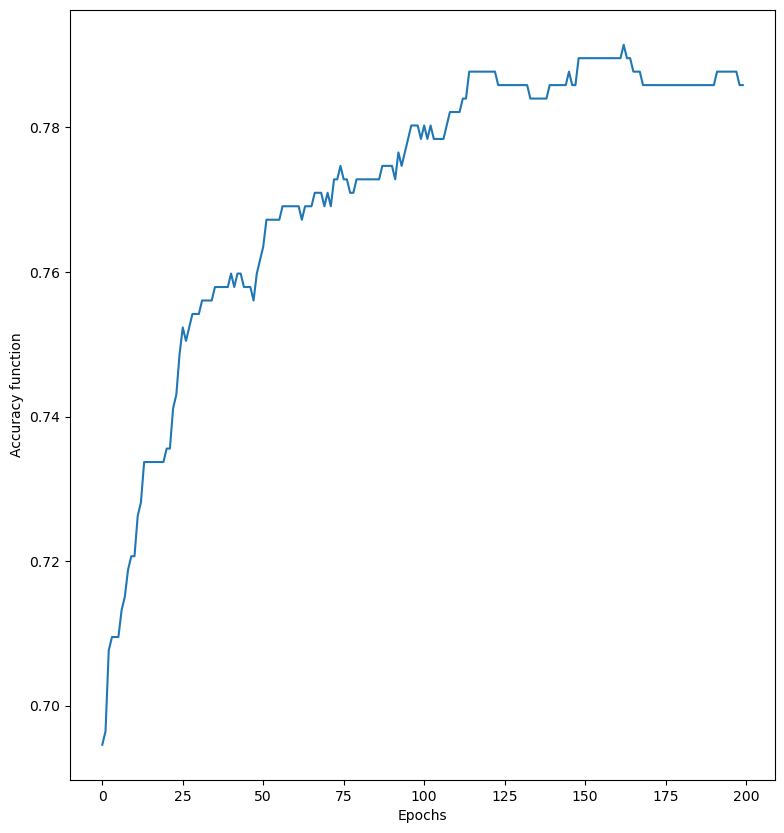

In [39]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [40]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")


8/8 [==============================] - 0s 1ms/step


In [41]:
Y_pred

array([[0.23598692],
       [0.13121146],
       [0.11818137],
       [0.21205173],
       [0.49060774],
       [0.35991392],
       [0.02202033],
       [0.54195136],
       [0.6062794 ],
       [0.69802237],
       [0.34006572],
       [0.8335535 ],
       [0.43015498],
       [0.3448362 ],
       [0.06997378],
       [0.3437095 ],
       [0.09190381],
       [0.05864076],
       [0.88230294],
       [0.5346433 ],
       [0.1931764 ],
       [0.04692788],
       [0.5473581 ],
       [0.06577064],
       [0.6453565 ],
       [0.88852197],
       [0.08988744],
       [0.03296626],
       [0.23190619],
       [0.08965786],
       [0.7997727 ],
       [0.8429271 ],
       [0.8208779 ],
       [0.7530416 ],
       [0.63562584],
       [0.8112779 ],
       [0.75376236],
       [0.16481954],
       [0.46732843],
       [0.5729084 ],
       [0.04626384],
       [0.5384701 ],
       [0.56958157],
       [0.3475676 ],
       [0.07341347],
       [0.69044745],
       [0.55391055],
       [0.174

In [42]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [43]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.7532
[0.49580416083335876, 0.7532467246055603]


In [44]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))


accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 1ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.788 	 0.734 	 0.617
  Test 	 0.753 	 0.642 	 0.650


In [45]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [46]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [47]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
#creamos la variable target a dummies
dummy_y = np_utils.to_categorical(Y).astype(int)

In [51]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [52]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [53]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200


C:\Users\omara\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 177ms/step - loss: 1.4654 - accuracy: 0.4083 - val_loss: 3.2661 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 32ms/step - loss: 2.7156 - accuracy: 0.2917 - val_loss: 0.8585 - val_accuracy: 0.6333
Epoch 3/200
2/2 [==============================] - 0s 32ms/step - loss: 0.8626 - accuracy: 0.6417 - val_loss: 0.8746 - val_accuracy: 0.7000
Epoch 4/200
2/2 [==============================] - 0s 34ms/step - loss: 0.8706 - accuracy: 0.6583 - val_loss: 0.7481 - val_accuracy: 0.7000
Epoch 5/200
2/2 [==============================] - 0s 32ms/step - loss: 0.7517 - accuracy: 0.6583 - val_loss: 0.6165 - val_accuracy: 0.7000
Epoch 6/200
2/2 [==============================] - 0s 31ms/step - loss: 0.6486 - accuracy: 0.6583 - val_loss: 0.5286 - val_accuracy: 0.7000
Epoch 7/200
2/2 [==============================] - 0s 29ms/step - loss: 0.5669 - accuracy: 0.6583 - val_loss: 0.4847 - val_accuracy: 0.7333
Epoch 8/200
2/2 [==============

2/2 [==============================] - 0s 30ms/step - loss: 0.0774 - accuracy: 0.9583 - val_loss: 0.0671 - val_accuracy: 0.9667
Epoch 118/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0727 - accuracy: 0.9833 - val_loss: 0.0663 - val_accuracy: 0.9667
Epoch 119/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0669 - accuracy: 0.9750 - val_loss: 0.2218 - val_accuracy: 0.8667
Epoch 120/200
2/2 [==============================] - 0s 31ms/step - loss: 0.1114 - accuracy: 0.9500 - val_loss: 0.0712 - val_accuracy: 0.9667
Epoch 121/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0623 - accuracy: 0.9833 - val_loss: 0.0734 - val_accuracy: 0.9667
Epoch 122/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0834 - accuracy: 0.9750 - val_loss: 0.0705 - val_accuracy: 0.9667
Epoch 123/200
2/2 [==============================] - 0s 30ms/step - loss: 0.0614 - accuracy: 0.9833 - val_loss: 0.1877 - val_accuracy: 0.9000
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 30ms/step - loss: 0.0651 - accuracy: 0.9667 - val_loss: 0.0970 - val_accuracy: 0.9667
Epoch 176/200
2/2 [==============================] - 0s 33ms/step - loss: 0.1121 - accuracy: 0.9667 - val_loss: 0.0698 - val_accuracy: 1.0000
Epoch 177/200
2/2 [==============================] - 0s 30ms/step - loss: 0.0642 - accuracy: 0.9833 - val_loss: 0.1978 - val_accuracy: 0.9000
Epoch 178/200
2/2 [==============================] - 0s 31ms/step - loss: 0.1030 - accuracy: 0.9500 - val_loss: 0.0647 - val_accuracy: 0.9667
Epoch 179/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0756 - accuracy: 0.9750 - val_loss: 0.0630 - val_accuracy: 0.9667
Epoch 180/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0732 - accuracy: 0.9750 - val_loss: 0.0700 - val_accuracy: 1.0000
Epoch 181/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0636 - accuracy: 0.9750 - val_loss: 0.0617 - val_accuracy: 0.9667
Epoch 

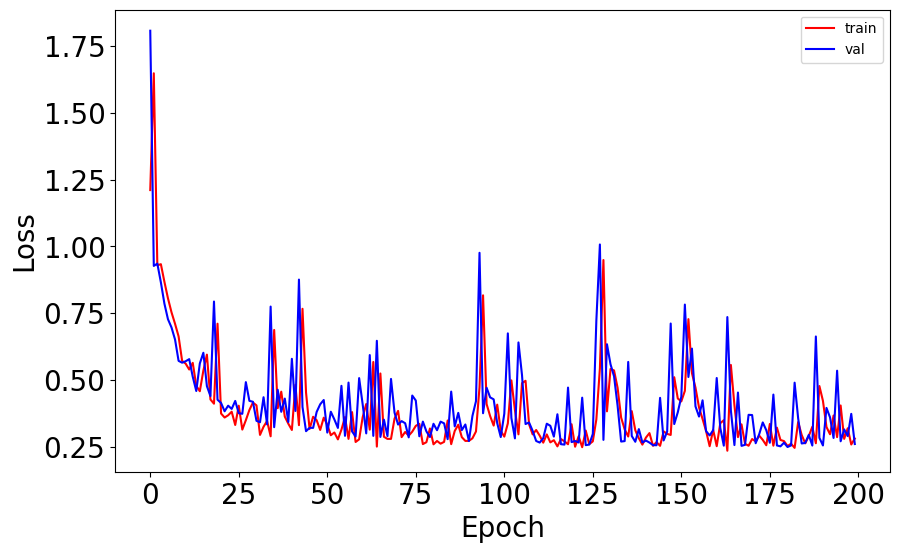

In [54]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [55]:
#Predecir con el modelo
#Y_pred = model.predict_classes(X)
#Y_prob = model.predict_proba(X)


Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 24ms/step


In [56]:
Y_pred

array([[4.7250605e-06, 9.8713660e-01, 1.2858656e-02],
       [9.9969542e-01, 3.0466038e-04, 5.7017986e-20],
       [5.9514584e-16, 4.5126656e-04, 9.9954873e-01],
       [2.9795417e-06, 9.7219139e-01, 2.7805580e-02],
       [2.6723101e-06, 9.9231154e-01, 7.6856809e-03],
       [9.9930084e-01, 6.9909391e-04, 2.3551280e-18],
       [9.0942322e-04, 9.9904948e-01, 4.1122847e-05],
       [6.6320344e-10, 8.3276957e-02, 9.1672301e-01],
       [1.3766949e-07, 4.8168814e-01, 5.1831168e-01],
       [1.9258299e-04, 9.9955636e-01, 2.5103212e-04],
       [1.0058558e-08, 2.7906826e-01, 7.2093177e-01],
       [9.9877018e-01, 1.2297678e-03, 2.9599470e-17],
       [9.9973863e-01, 2.6131960e-04, 2.8674529e-20],
       [9.9889296e-01, 1.1070279e-03, 1.8475537e-17],
       [9.9957055e-01, 4.2942128e-04, 2.6531852e-19],
       [4.1785502e-06, 9.9369460e-01, 6.3012028e-03],
       [6.7572499e-13, 3.0650599e-03, 9.9693489e-01],
       [1.1470501e-04, 9.9898583e-01, 8.9949457e-04],
       [4.0010068e-06, 9.651

In [57]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [58]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [59]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [60]:
#Más métricas corregido
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')

Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 23ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.983 	 0.984 	 0.983
  Test 	 0.967 	 0.969 	 0.967


In [61]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 1.000 	 1.000 	 1.000


C:\Users\omara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
